In [ ]:
from google.colab import drive as drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Access a public Github repos
!rm -rf /content/Chest-CT-Scan-images-Dataset # remove git clone
%cd '/content'
!git clone https://github.com/ricardotran92/Chest-CT-Scan-images-Dataset.git

/content
Cloning into 'Chest-CT-Scan-images-Dataset'...
remote: Enumerating objects: 879, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 879 (delta 0), reused 0 (delta 0), pack-reused 876
Receiving objects: 100% (879/879), 82.50 MiB | 9.50 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Updating files: 100% (1233/1233), done.


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image


In [ ]:
# @title
def DataSetSummary (local_path, tabs):
  # Take list of files & folders in local folder
  all_items = os.listdir(local_path)

  # Filter folder list
  folders = [item for item in all_items if os.path.isdir(os.path.join(local_path, item))]

  # Print summary information if folders > 0:
  if(len(folders) > 0):
    indent = '\t' * tabs
    print("{}Tổng số thư mục: {}".format(indent, len(folders)))
    for folder in folders:
      folder_path = os.path.join(local_path, folder)
      files_in_folder = len(os.listdir(folder_path))
      print("{}-Thư mục: {}, Số tệp: {}".format(indent, folder, files_in_folder))
      DataSetSummary(folder_path, tabs+1)

# DataSetSummary(local_path, 0)

In [ ]:
# import os

# Hierarchical local folder in Colab
repository_folder = ["Chest-CT-Scan-images-Dataset"]

for folder in repository_folder:
  local_path = '/content/' + folder + '/dataset'
  DataSetSummary(local_path, 0)
  local_path = '/content/' + folder + '/sample'
  DataSetSummary(local_path, 0)

Tổng số thư mục: 3
-Thư mục: test, Số tệp: 4
	Tổng số thư mục: 4
	-Thư mục: squamous.cell.carcinoma, Số tệp: 90
	-Thư mục: adenocarcinoma, Số tệp: 120
	-Thư mục: normal, Số tệp: 54
	-Thư mục: large.cell.carcinoma, Số tệp: 51
-Thư mục: train, Số tệp: 4
	Tổng số thư mục: 4
	-Thư mục: adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib, Số tệp: 195
	-Thư mục: normal, Số tệp: 148
	-Thư mục: large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa, Số tệp: 115
	-Thư mục: squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa, Số tệp: 155
-Thư mục: valid, Số tệp: 4
	Tổng số thư mục: 4
	-Thư mục: adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib, Số tệp: 23
	-Thư mục: normal, Số tệp: 13
	-Thư mục: large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa, Số tệp: 21
	-Thư mục: squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa, Số tệp: 15
Tổng số thư mục: 3
-Thư mục: test, Số tệp: 4
	Tổng số thư mục: 4
	-Thư mục: squamous.cell.carcinoma, Số tệp: 20
	-Thư mục: adenocarcinoma, Số tệp: 20
	-Thư mục: normal, Số tệp: 20
	-Thư mục: large.cell.c

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Chest-CT-Scan-images-Dataset

/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Chest-CT-Scan-images-Dataset


In [ ]:
# Set the path to your dataset
dataset_path = '/content/Chest-CT-Scan-images-Dataset/sample'
# dataset_path = '/content/Chest-CT-Scan-images-Dataset/dataset'

In [ ]:
# import os

# class Image:
#     def __init__(self, path, label):
#         # self.image = cv2.imread(path) # directly read
#         self.path = path # only directory
#         self.label = label

# def load_images_from_folder(dataset_path):
#     images = []
#     # labels = [] # direct
#     for class_name in os.listdir(dataset_path):
#         class_folder_path = os.path.join(dataset_path, class_name)
#         if os.path.isdir(class_folder_path):
#             for image_name in os.listdir(class_folder_path):
#                 image_path = os.path.join(class_folder_path, image_name)
#                 img = Image(image_path, class_name)
#                 images.append(img)
#                 # labels.append(img.label) # direct
#     # return images, labels # direct
#     return images

# images = load_images_from_folder(dataset_path)
# # for class_name, imgs in images.items():
# #     for img in imgs:
# #         print(f"Path: {img.path}, Label: {img.label}")

Class adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib


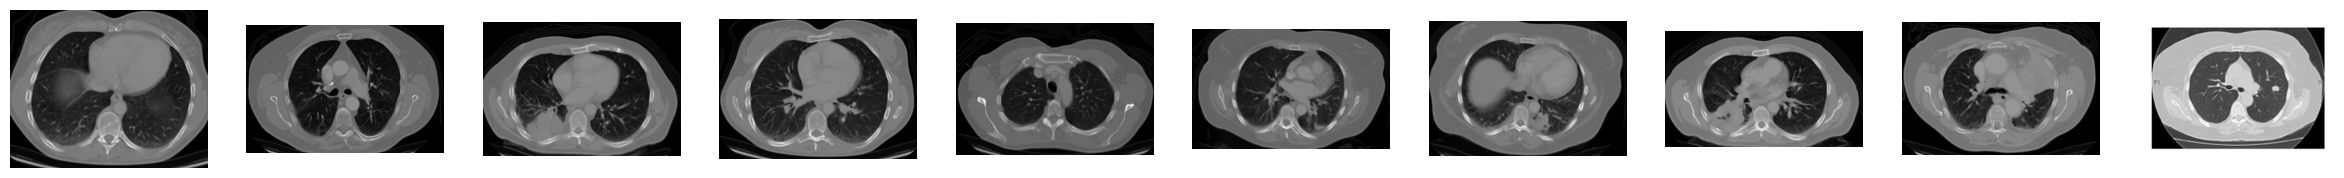

Class large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa


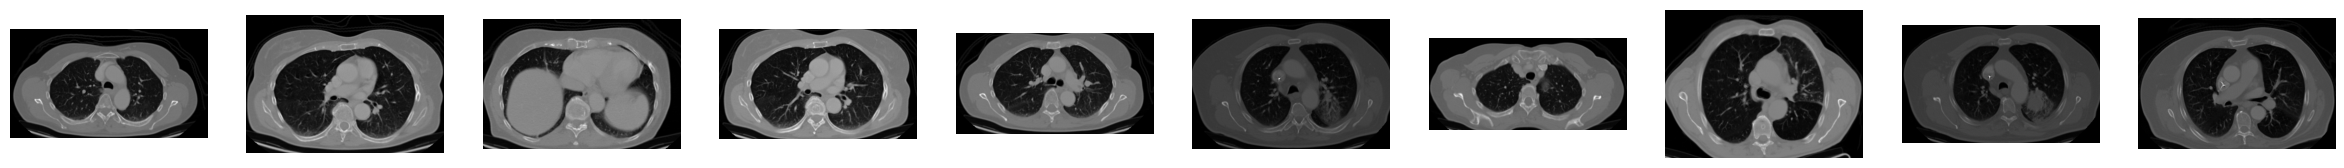

Class normal


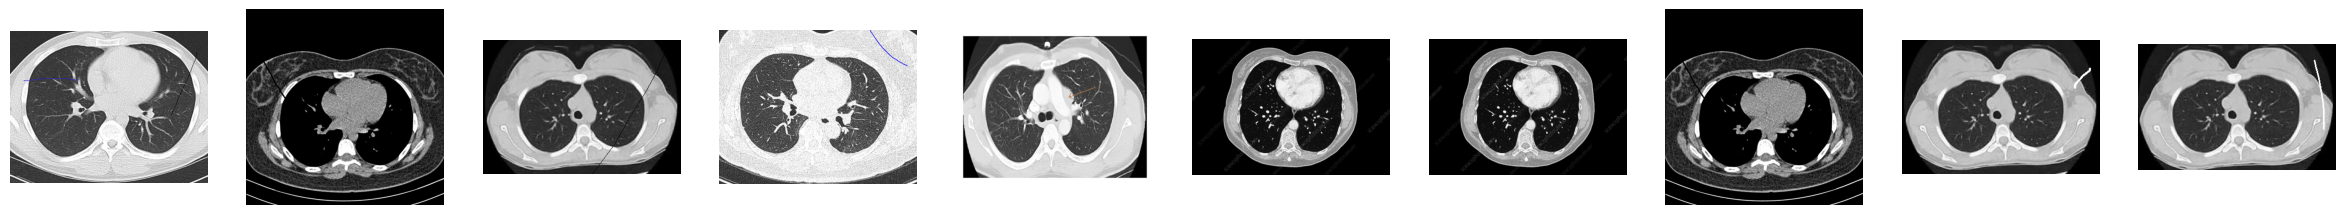

Class squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa


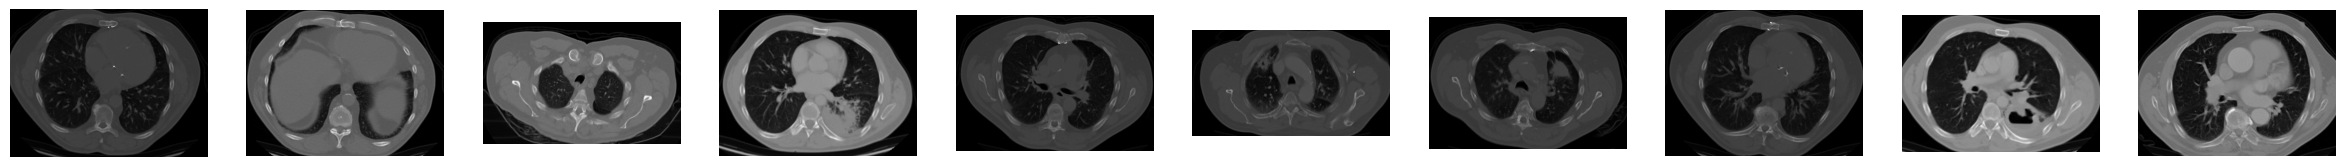

In [ ]:
class Image:
    def __init__(self, path, label):
        # self.image = cv2.imread(path) # directly read
        self.path = path # only directory
        self.label = label

def load_images_from_folder(dataset_path, images_per_class=None):
    images = {}
    for class_name in os.listdir(dataset_path):
        class_folder_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder_path):
            count = 0
            images[class_name] = []
            for image_name in os.listdir(class_folder_path):
                if images_per_class is None or count < images_per_class:
                    image_path = os.path.join(class_folder_path, image_name)
                    img = Image(image_path, class_name)
                    images[class_name].append(img)
                    count += 1
    return images

def imshow(images, images_per_class=None):
    for class_name, imgs in images.items():
        plt.figure(figsize=(30,30))
        print(f'Class {class_name}')
        for i in range(min(images_per_class if images_per_class else len(imgs), len(imgs))):
            plt.subplot(1, images_per_class if images_per_class else len(imgs), i+1)
            img = cv2.imread(imgs[i].path)
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            # plt.title(os.path.basename(imgs[i].path))
            plt.axis('off')
        plt.show()

# Example usage:
images = load_images_from_folder('/content/Chest-CT-Scan-images-Dataset/dataset/train')
imshow(images, 10)


In [ ]:
from PIL import Image

def get_image_specifications(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Get image specifications
        image_format = img.format
        image_mode = img.mode
        image_size = img.size
        image_width, image_height = img.size
        image_color = img.getcolors()

    return f"Image Format: {image_format}\nImage Mode: {image_mode}\nImage Size: {image_size} pixels (Width: {image_width}, Height: {image_height})\nImage Colors: {image_color}"

# Example usage:
print('images.keys:', images.keys())
image_path = "/content/Chest-CT-Scan-images-Dataset/sample/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000000 (6).png"
# print('image_path:',image_path := images['normal'][0].path)
image_specifications = get_image_specifications(image_path)
print(image_specifications)

images.keys: dict_keys(['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'])
Image Format: PNG
Image Mode: RGBA
Image Size: (409, 264) pixels (Width: 409, Height: 264)
Image Colors: [(1, (255, 255, 255, 255)), (1, (241, 241, 241, 255)), (1, (235, 235, 235, 255)), (1, (229, 229, 229, 255)), (2, (225, 225, 225, 255)), (1, (221, 221, 221, 255)), (1, (219, 219, 219, 255)), (1, (217, 217, 217, 255)), (1, (215, 215, 215, 255)), (2, (209, 209, 209, 255)), (2, (207, 207, 207, 255)), (1, (205, 205, 205, 255)), (3, (203, 203, 203, 255)), (3, (201, 201, 201, 255)), (2, (199, 199, 199, 255)), (3, (197, 197, 197, 255)), (7, (193, 193, 193, 255)), (4, (191, 191, 191, 255)), (1, (189, 189, 189, 255)), (2, (187, 187, 187, 255)), (4, (185, 185, 185, 255)), (7, (183, 183, 183, 255)), (2, (181, 181, 181, 255)), (4, (179, 179, 179, 255)), (8, (177, 177, 177, 255)), (9, (175, 175, 175, 255)), (10, (173,

## Noise Metrics

GitHub Copilot: The evaluation metrics indicate that both the Github Copilot's code and ChatGPT's code have successfully reduced the noise in the image, as evidenced by the non-infinite PSNR and non-zero RMSE values.

The PSNR (Peak Signal-to-Noise Ratio) is a measure of the peak error. The fact that PSNR is infinite for the original image indicates there's no noise (as it's being compared with itself), while for the processed images, the PSNR values are finite and quite high, indicating a low level of distortion.

The RMSE (Root Mean Square Error) is a quadratic scoring rule that measures the average magnitude of the error. The fact that RMSE is zero for the original image indicates there's no error (as it's being compared with itself), while for the processed images, the RMSE values are non-zero but quite low, indicating a low level of error.

The SNR (Signal-to-Noise Ratio) is a measure of signal strength relative to background noise. The negative SNR values indicate that the noise is stronger than the signal, which is not ideal. However, the SNR values have increased (become less negative) from the original to the processed images, indicating that the signal has become stronger relative to the noise.

In terms of comparison between Github Copilot's code and ChatGPT's code, the metrics are quite similar, but ChatGPT's code has slightly better PSNR and RMSE values, indicating slightly less distortion and error. However, the differences are quite small and may not be noticeable in the image quality.

GitHub Copilot: Dĩ nhiên, dưới đây là các định nghĩa bằng tiếng Việt:

1. PSNR (Peak Signal-to-Noise Ratio - Tỉ lệ tín hiệu so với nhiễu): PSNR là một độ đo chất lượng của hình ảnh đã được khôi phục so với hình ảnh gốc. PSNR càng cao, chất lượng hình ảnh khôi phục càng tốt và càng giống với hình ảnh gốc.

2. RMSE (Root Mean Square Error - Sai số bình phương trung bình): RMSE là một độ đo sự khác biệt giữa các giá trị dự đoán bởi một mô hình và các giá trị thực tế. RMSE càng thấp, mô hình dự đoán càng chính xác.

3. SNR (Signal-to-Noise Ratio - Tỉ lệ tín hiệu so với nhiễu): SNR là một độ đo chất lượng tín hiệu so với nhiễu. SNR càng cao, chất lượng tín hiệu càng tốt và nhiễu càng ít.

Lưu ý rằng, mặc dù PSNR, RMSE, và SNR cao thường cho thấy chất lượng hình ảnh tốt hơn, nhưng chúng không phải lúc nào cũng dẫn đến độ chính xác cao hơn trong các tác vụ phân loại.

In [ ]:
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error

def calculate_metrics(original, processed):
    # Calculate the PSNR
    psnr = peak_signal_noise_ratio(original, processed)

    # Calculate the RMSE
    rmse = np.sqrt(mean_squared_error(original, processed))

    # Calculate the SNR
    mean = np.mean(processed)
    std = np.std(processed)
    snr = 20 * np.log10(mean / (std + 1e-10)) # 1e-10: avoid error std=0

    return psnr, rmse, snr

## Original

In [ ]:
import os
import cv2
import numpy as np
from shutil import copyfile

def preprocess_and_copy(src_dir, dest_dir, preprocess_func):
    # Check if src_dir is a directory
    if os.path.isdir(src_dir):
        # If dest_dir does not exist, create it
        os.makedirs(dest_dir, exist_ok=True)

        # Iterate over files/directories in src_dir
        for item in os.listdir(src_dir):
            src_item_path = os.path.join(src_dir, item)
            dest_item_path = os.path.join(dest_dir, item)

            # If item is a directory, call function recursively
            if os.path.isdir(src_item_path):
                preprocess_and_copy(src_item_path, dest_item_path, preprocess_func)
            # If item is a file, apply preprocessing and copy
            elif os.path.isfile(src_item_path):
                img = cv2.imread(src_item_path)
                if img is not None:
                    img = preprocess_func(img)
                    cv2.imwrite(dest_item_path, img)

# Define your preprocessing function here
def preprocess_func(img):
    # TODO: Add your preprocessing steps here
    return img

# Usage:
dataset_path = '/content/Chest-CT-Scan-images-Dataset/sample'
# dataset_path = '/content/Chest-CT-Scan-images-Dataset/dataset'
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Chest-CT-Scan-images-Dataset/Original'
preprocess_and_copy(dataset_path, output_path, preprocess_func)

## Butterworth

### Bandpass idea

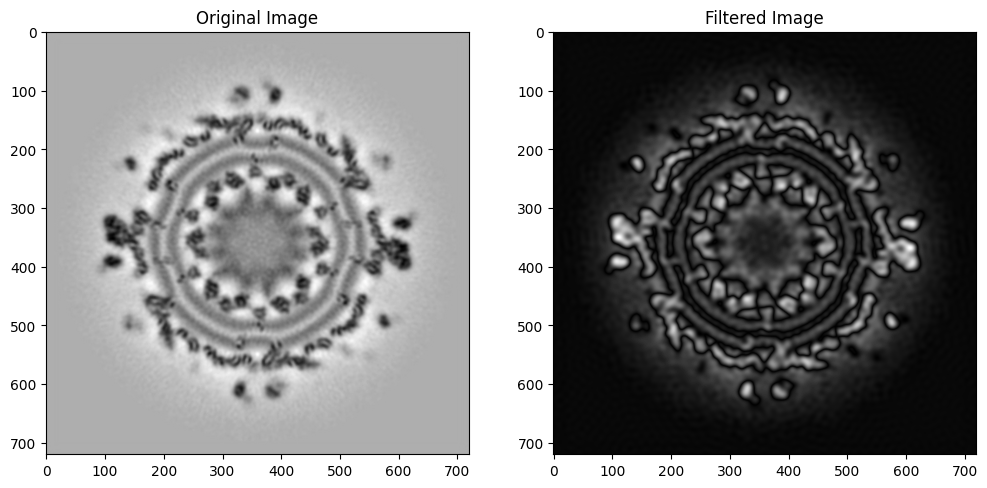

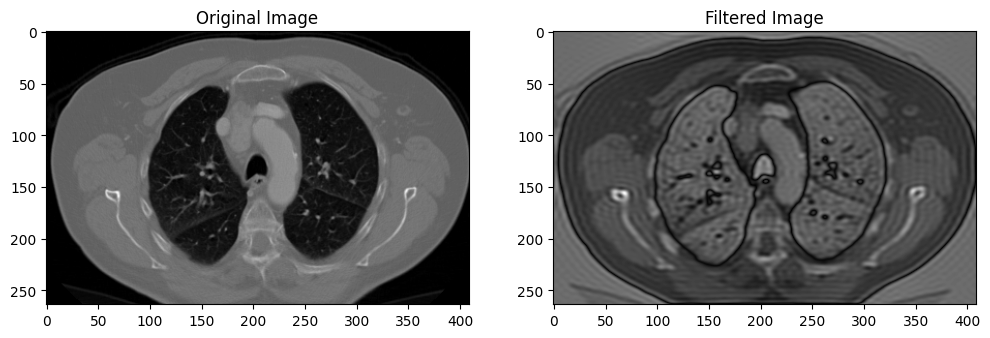

In [39]:
import scipy.misc
import numpy, math
import scipy.fftpack as fftim
from PIL import Image
import cv2
# Opening the image and converting it to grayscale.

def bandpass(b):
    # Performing FFT.
    c = fftim.fft2(b)
    # Shifting the Fourier frequency image .
    d = fftim.fftshift(c)
    # Intializing variables for convolution function.
    M = d.shape[0]
    N = d.shape[1]
    # H is defined and
    # values in H are initialized to 1.
    H = numpy.zeros((M,N))
    center1 = M/2
    center2 = N/2
    d_0 = 0.75 # minimum cut-off radius
    d_1 = 50.0 # maximum cut-off radius

    # Defining the convolution function for bandpass
    for i in range(1,M):
        for j in range(1,N):
            r1 = (i-center1)**2+(j-center2)**2
            # Euclidean distance from
            # origin is computed.
            r = math.sqrt(r1)
            # Using min and max cut-off to create
    # the band or annulus.
            if r > d_0 and r < d_1:
                H[i,j] = 1.0

    # Converting H to an image.
    H = Image.fromarray(H)
    # Performing the convolution.
    con = d * H

    # Computing the magnitude of the inverse FFT.
    e = abs(fftim.ifft2(con))
    return e
# # Saving the image as ibandpass_output.png.
# cv2.imwrite('../Figures/ibandpass_output.png', e)
list = ['/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/temp/fft1.png',
        '/content/Chest-CT-Scan-images-Dataset/sample/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000000 (6).png']
# b = Image.open('/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/temp/fft1.png').convert('L')
for i in list:
    b = Image.open(i).convert('L')
    e = bandpass(b)

    # Display the original and processed images side by side

    plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    plt.imshow(b, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1,2,2)
    plt.imshow(e, cmap='gray')
    # plt.title(f'Lowcut={lowcut}, Highcut={highcut}, Order={order}')
    plt.title('Filtered Image')

    plt.show()

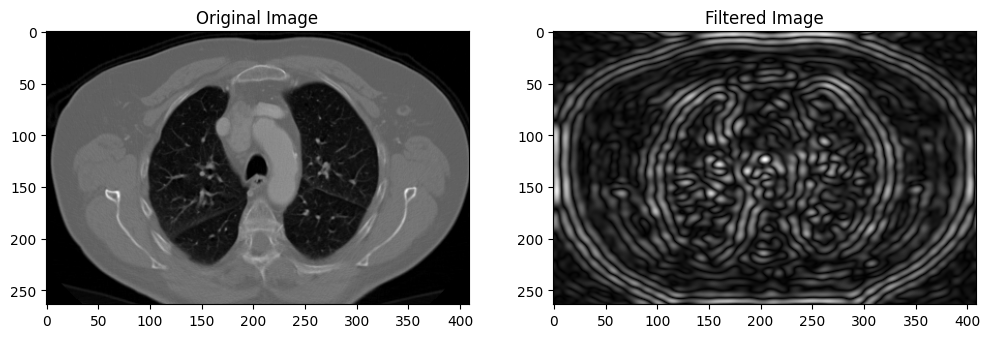

In [33]:
import scipy.misc
import numpy, math
import scipy.fftpack as fftim
from PIL import Image
import cv2
# Opening the image and converting it to grayscale.
# b = Image.open('/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/temp/fft1.png').convert('L')
b = Image.open('/content/Chest-CT-Scan-images-Dataset/sample/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000000 (6).png').convert('L')
# Performing FFT.
c = fftim.fft2(b)
# Shifting the Fourier frequency image .
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and
# values in H are initialized to 1.
H = numpy.zeros((M,N))
center1 = M/2
center2 = N/2
d_0 = 15.0 # minimum cut-off radius
d_1 = 30.0 # maximum cut-off radius

# Defining the convolution function for bandpass
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = math.sqrt(r1)
        # Using min and max cut-off to create
# the band or annulus.
        if r > d_0 and r < d_1:
            H[i,j] = 1.0

# Converting H to an image.
H = Image.fromarray(H)
# Performing the convolution.
con = d * H

# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con))
# # Saving the image as ibandpass_output.png.
# cv2.imwrite('../Figures/ibandpass_output.png', e)

# Display the original and processed images side by side
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(b, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(e, cmap='gray')
# plt.title(f'Lowcut={lowcut}, Highcut={highcut}, Order={order}')
plt.title('Filtered Image')

plt.show()

GitHub Copilot: The Butterworth bandpass filter is a type of filter that passes frequencies within a certain range and rejects frequencies outside that range. The parameters of the filter, including the low cut-off frequency (`lowcut`), high cut-off frequency (`highcut`), and order (`order`), can significantly affect the output image in terms of brightness, noise, edge sharpness, and detail.

1. `lowcut`: This parameter determines the smallest features that will be preserved in the image. If `lowcut` is set too high, smaller details in the image may be lost, and the image may appear blurred. This can also reduce the overall brightness of the image, as the low frequencies in the Fourier domain correspond to the overall brightness in the spatial domain.

2. `highcut`: This parameter determines the largest features that will be preserved in the image. If `highcut` is set too low, larger details in the image may be lost, and the image may appear more noisy. This can also reduce the contrast of the image, as the high frequencies in the Fourier domain correspond to the edges and fine details in the spatial domain.

3. `order`: This parameter determines the sharpness of the transition between the passband and the stopband. A higher order results in a steeper transition, which can help to more precisely control which frequencies are passed and which are stopped. However, a higher order can also result in more ringing artifacts in the spatial domain, which can appear as ripples or echoes near the edges of objects.

In general, you would need to adjust these parameters based on the specific characteristics of your image and the desired output. For example, if your image has a lot of small details and you want to preserve these while reducing noise, you might choose a lower `lowcut` and a higher `highcut`. If your image has a lot of large objects and you want to enhance these while reducing smaller details, you might choose a higher `lowcut` and a lower `highcut`. The `order` can be adjusted based on how sharp you want the transition between the passband and the stopband to be.

In [ ]:
rows, cols = 3, 4 # image.shape

# # part code 1:
# Create a meshgrid for the (u, v) coordinates
x = np.linspace(-0.5, 0.5, cols, endpoint=False) * cols
y = np.linspace(-0.5, 0.5, rows, endpoint=False) * rows
x, y = np.meshgrid(x, y)
radius = np.sqrt(x**2 + y**2)
# Calculate the distance to the center of the frequency domain
display(x, y, radius)

# part code 2:
x = np.linspace(-0.5, 0.5, cols) * cols
y = np.linspace(-0.5, 0.5, rows) * rows
radius = np.sqrt((x[np.newaxis,:]**2) + (y[:,np.newaxis]**2))
display(x, y, radius)

array([[-2., -1.,  0.,  1.],
       [-2., -1.,  0.,  1.],
       [-2., -1.,  0.,  1.]])

array([[-1.5, -1.5, -1.5, -1.5],
       [-0.5, -0.5, -0.5, -0.5],
       [ 0.5,  0.5,  0.5,  0.5]])

array([[2.5       , 1.80277564, 1.5       , 1.80277564],
       [2.06155281, 1.11803399, 0.5       , 1.11803399],
       [2.06155281, 1.11803399, 0.5       , 1.11803399]])

array([-2.        , -0.66666667,  0.66666667,  2.        ])

array([-1.5,  0. ,  1.5])

array([[2.5       , 1.6414763 , 1.6414763 , 2.5       ],
       [2.        , 0.66666667, 0.66666667, 2.        ],
       [2.5       , 1.6414763 , 1.6414763 , 2.5       ]])

GitHub Copilot: The radius calculation is used to determine the distance of each point in the frequency domain from the center. This distance is then used to determine whether a given frequency should be passed or stopped by the filter.

In Code 1, the `np.meshgrid` function is used to create a two-dimensional grid of `x` and `y` values, and the radius is calculated as the Euclidean distance from each point to the center of the grid (0.5, 0.5). This means that the filter will be centered around the middle of the frequency domain, which corresponds to the low frequencies in the image.

In Code 2, the `x` and `y` values are scaled by the width and height of the image, respectively, before the radius is calculated. This means that the filter will be centered around the origin of the frequency domain, which corresponds to the high frequencies in the image.

The choice between these two methods depends on the specific characteristics of your image and the desired output. If your image has a lot of high-frequency noise that you want to remove, you might choose the method from Code 2. If your image has a lot of low-frequency noise or you want to preserve the low-frequency components of the image, you might choose the method from Code 1.

In both cases, you would need to adjust the `lowcut` and `highcut` frequencies based on the specific frequencies you want to pass or stop. The `lowcut` frequency should be set to the smallest feature size you want to preserve, and the `highcut` frequency should be set to the largest feature size you want to preserve.

### Option 1:

In [ ]:
import numpy as np
import cv2
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2

import os
from shutil import copyfile

# Define that paths
dataset_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/sample'
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/CLAHE_Butterworth_HE_8'

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Get the list of child class folders
child_folders = os.listdir(dataset_path)

def butterworth_bandpass_filter(image, low_cutoff, high_cutoff, order=2):
    rows, cols = image.shape
    x = np.linspace(-0.5, 0.5, cols, endpoint=False)
    y = np.linspace(-0.5, 0.5, rows, endpoint=False)
    [x, y] = np.meshgrid(x, y)
    radius = np.sqrt((x ** 2) + (y ** 2))
    filter_ = 1 / (1.0 + (radius / low_cutoff) ** (2 * order))
    filter_ = 1 - filter_
    filter_ = 1 - 1 / (1.0 + (radius / high_cutoff) ** (2 * order)) * filter_
    return filter_


# Process each child class folder
for folder in child_folders:
    # Create the output folder for the current child class
    output_folder = os.path.join(output_path, folder)
    os.makedirs(output_folder, exist_ok=True)

    # Get the list of image files in the current child class folder
    folder_path = os.path.join(dataset_path, folder)
    image_files = os.listdir(folder_path)

    # Process each image file
    for image_file in image_files:
        # Read the image
        image_path = os.path.join(folder_path, image_file)
        img = cv2.imread(image_path, 0)

        # Apply CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        cl1 = clahe.apply(img)

        # Apply Butterworth bandpass filter
        img_dft = fftshift(fft2(cl1))
        # filter_ = butterworth_bandpass_filter(cl1, low_cutoff=0.0, high_cutoff=0.3)
        # filter_ = butterworth_bandpass_filter(cl1, low_cutoff=0.05, high_cutoff=0.5)  # Adjust the cutoff frequencies
        filter_ = butterworth_bandpass_filter(cl1, low_cutoff=0.2, high_cutoff=0.3)
        img_filtered = np.abs(ifft2(ifftshift(img_dft * filter_)))

        # Normalize the filtered image to the range [0, 255]
        img_filtered = cv2.normalize(img_filtered, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

        # Apply histogram equalization
        equalized_image = cv2.equalizeHist(img_filtered)

        # Export the preprocessed image to the output folder
        filename, extension = os.path.splitext(image_file)
        output_image_path = os.path.join(output_folder, filename + '.jpg')
        # cv2.imwrite(output_image_path, img_filtered)
        cv2.imwrite(output_image_path, equalized_image)

In [ ]:
import os
import cv2
import numpy as np
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2
from shutil import copyfile

# Define the paths
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/CLAHE_Butterworth_HE_6'

# Define Butterworth low pass and high pass filters
def butterworth_bandpass_filter(image, low_cutoff, high_cutoff, order=2):
    # Get the image dimensions
    rows, cols = image.shape

    # Create a meshgrid for the (u, v) coordinates
    x = np.linspace(-0.5, 0.5, cols, endpoint=False)
    y = np.linspace(-0.5, 0.5, rows, endpoint=False)
    u, v = np.meshgrid(x, y)

    # Calculate the distance to the center of the frequency domain
    D = np.sqrt(u**2 + v**2)

    # Create the Butterworth bandpass filter
    H = 1 / (1 + (D / low_cutoff)**(2*order)) * (1 - 1 / (1 + (D / high_cutoff)**(2*order)))

    # Apply the filter to the image in the frequency domain
    G = H * fftshift(fft2(image))

    # Convert the image back to the spatial domain
    filtered_image = np.abs(ifft2(ifftshift(G)))

    # Normalize the filtered image to the range [0, 255]
    filtered_image = cv2.normalize(filtered_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    return filtered_image


# Get the list of child class folders
child_folders = os.listdir(dataset_path)

# Process each child class folder
for folder in child_folders:
    # Create the output folder for the current child class
    output_folder = os.path.join(output_path, folder)
    os.makedirs(output_folder, exist_ok=True)

    # Get the list of image files in the current child class folder
    folder_path = os.path.join(dataset_path, folder)
    image_files = os.listdir(folder_path)

    # Process each image file
    for image_file in image_files:
        # Read the image
        image_path = os.path.join(folder_path, image_file)
        img = cv2.imread(image_path, 0)

        # Apply CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        cl1 = clahe.apply(img)

        # Apply the Butterworth bandpass filter to the image
        filtered_image = butterworth_bandpass_filter(cl1, low_cutoff=0.01, high_cutoff=0.3)

        # Preserve brightness
        filtered_image = cv2.addWeighted(cl1, 0.5, filtered_image, 0.5, 0)

        # Apply histogram equalization
        # equalized_image = cv2.equalizeHist(filtered_image)

        # Export the preprocessed image to the output folder
        filename, extension = os.path.splitext(image_file)
        output_image_path = os.path.join(output_folder, filename + '.jpg')
        cv2.imwrite(output_image_path, filtered_image)
        # cv2.imwrite(output_image_path, equalized_image)

#### v1.1

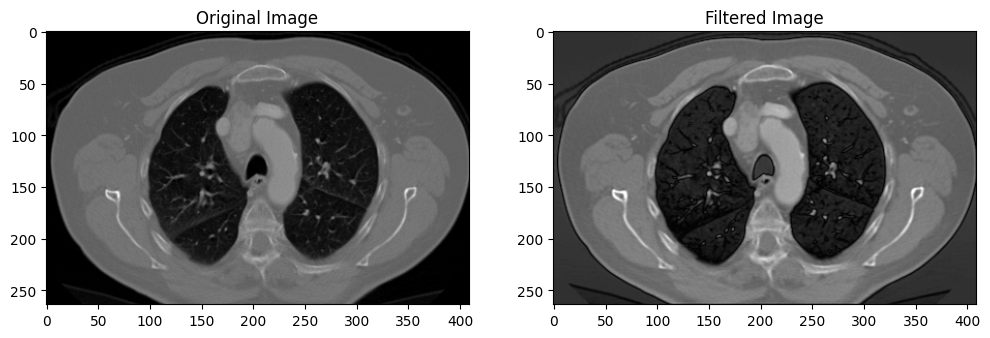

In [ ]:
# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2

# Load the image
img_path = '/content/Chest-CT-Scan-images-Dataset/sample/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000000 (6).png'
# img_path = '/content/Chest-CT-Scan-images-Dataset/sample/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/000002.png'
# img_path = '/content/Chest-CT-Scan-images-Dataset/sample/train/normal/2 (2) - Copy.png'
# img_path = '/content/Chest-CT-Scan-images-Dataset/sample/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000002 (4).png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

def butterworth_bandpass_filter(image, lowcut, highcut, order=3):
    rows, cols = image.shape
    x = np.linspace(-0.5, 0.5, cols) * cols
    y = np.linspace(-0.5, 0.5, rows) * rows
    [x, y] = np.meshgrid(x, y)
    radius = np.sqrt((x ** 2) + (y ** 2))

    # Compute the low-pass filter
    lowpass = 1 / (1.0 + (radius / lowcut)**(2*order))

    # Compute the high-pass filter
    highpass = 1.0 - 1 / (1.0 + (radius / highcut)**(2*order))

    # Multiply the filters to get the band-pass filter
    bandpass = lowpass * highpass

    # Apply the filter to the Fourier transform of the image
    image_fft = fftshift(fft2(image))
    filtered_fft = image_fft * bandpass

    # Compute the inverse Fourier transform to get the filtered image
    filtered_image = np.abs(ifft2(ifftshift(filtered_fft)))

    # Scale the filtered image to the same range as the original image
    min_val = np.min(image)
    max_val = np.max(image) * 1.3 # Increase the maximum value to make the image brighter
    filtered_image = (filtered_image - np.min(filtered_image)) * (max_val - min_val) / (np.max(filtered_image) - np.min(filtered_image)) + min_val

    # # Add a constant value to all the pixels in the image to increase the brightness
    # filtered_image += 1  # Adjust this value as needed

    # Clip the pixel values to the valid range for images (0-255)
    filtered_image = np.clip(filtered_image, 0, 255)

    return filtered_image

# Apply Butterworth bandpass filter with the current parameters
filtered_img = butterworth_bandpass_filter(img, lowcut=0.5, highcut=120, order=2)

# Display the original and processed images side by side
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(filtered_img, cmap='gray')
plt.title('Filtered Image')

plt.show()

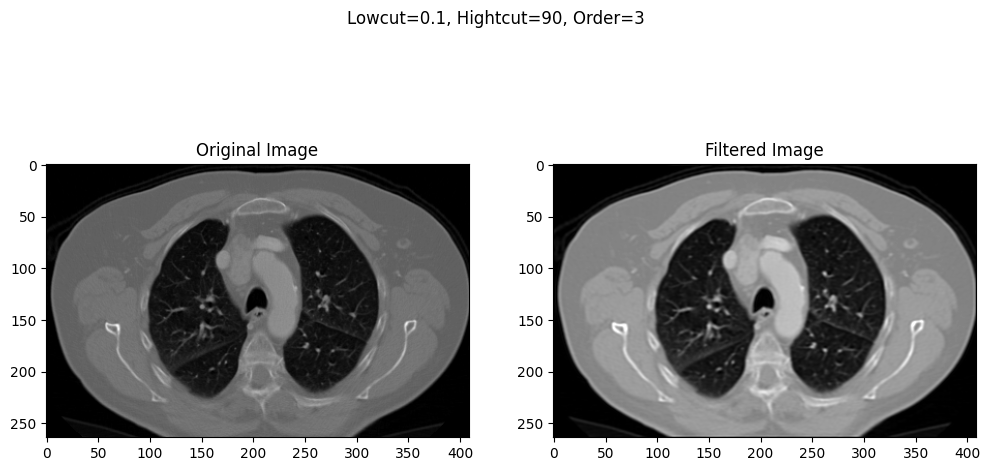

<ipython-input-20-21d9fa5e8d68>:5: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, processed)


PSNR: 18.592995406624524
RMSE: 29.98405805604832
SNR: 3.2756913234979272


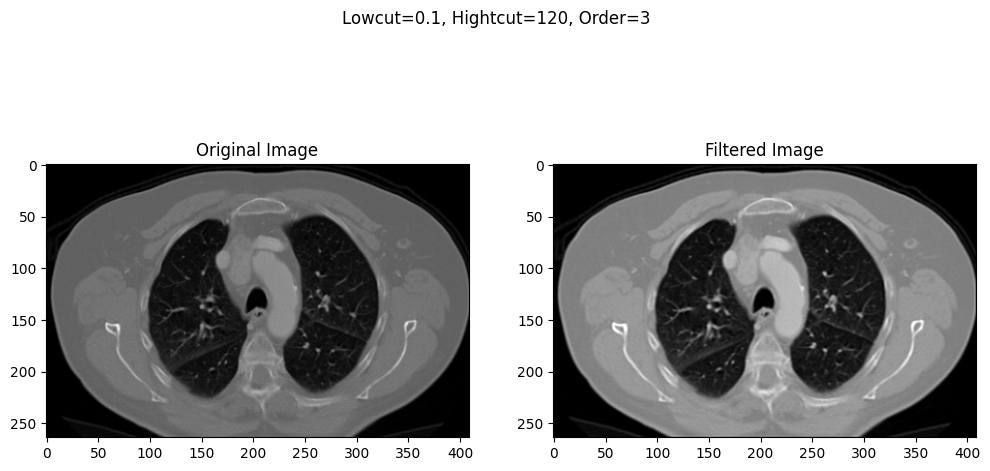

PSNR: 19.636533374531055
RMSE: 26.58970454924248
SNR: 3.2452544851174285


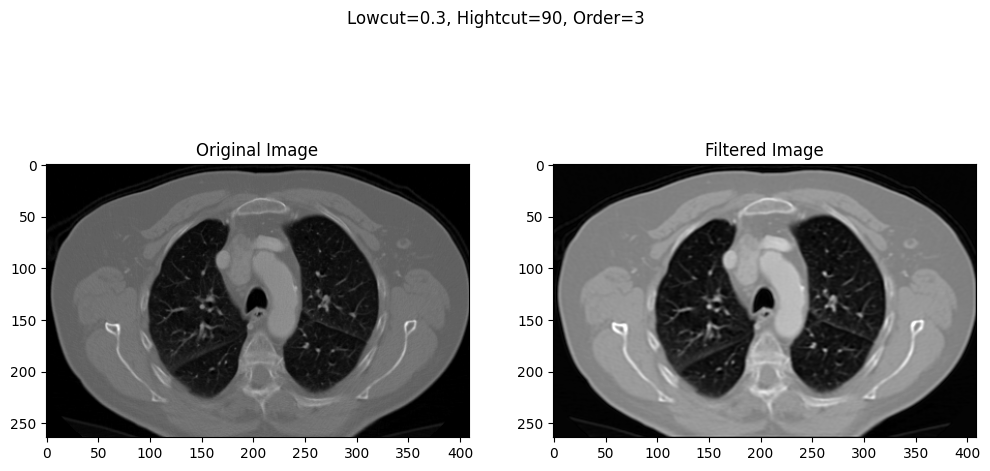

PSNR: 19.14018351547671
RMSE: 28.15340997597169
SNR: 3.1843507640090984


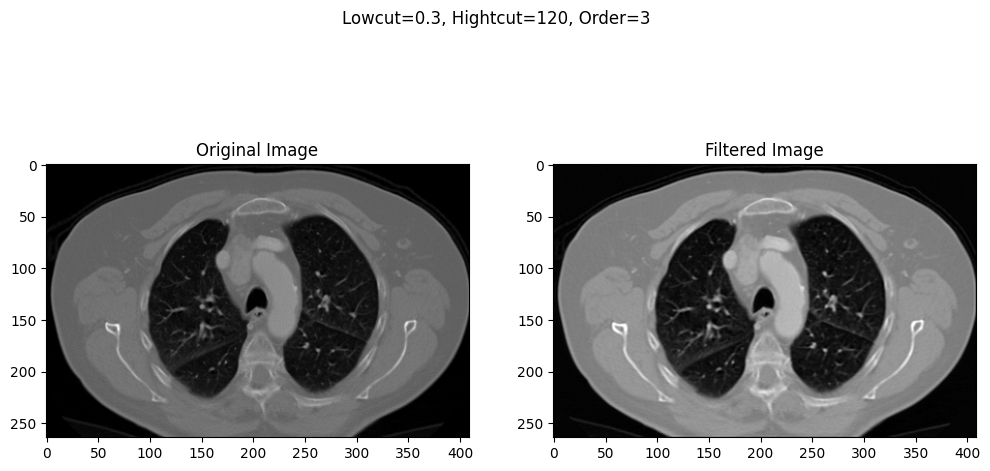

PSNR: 20.245028897135803
RMSE: 24.79069690187278
SNR: 3.159361469210201


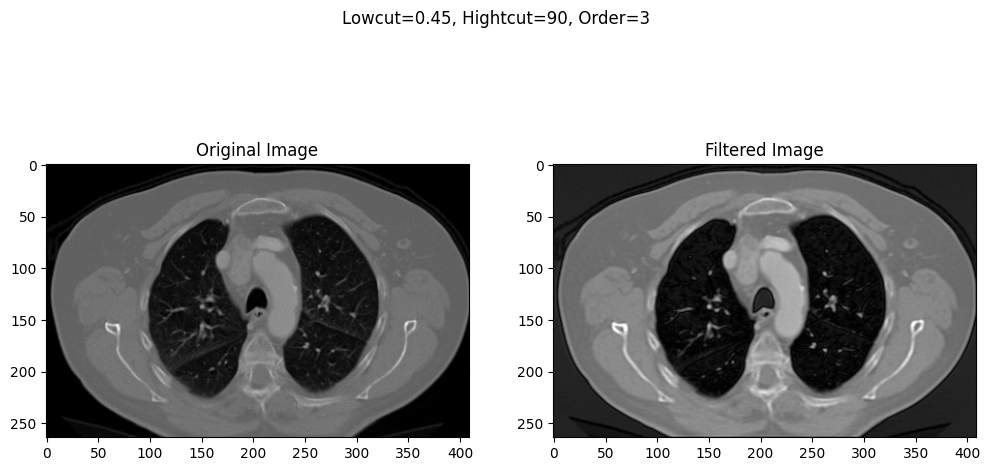

PSNR: 21.450512616396647
RMSE: 21.578166985224957
SNR: 3.7797335520530377


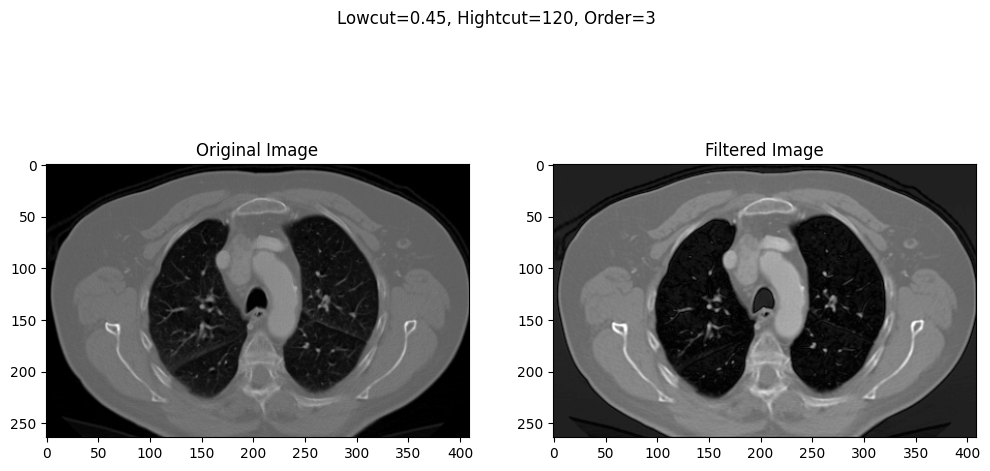

PSNR: 22.46509756599918
RMSE: 19.199295905103046
SNR: 3.7864843076601455


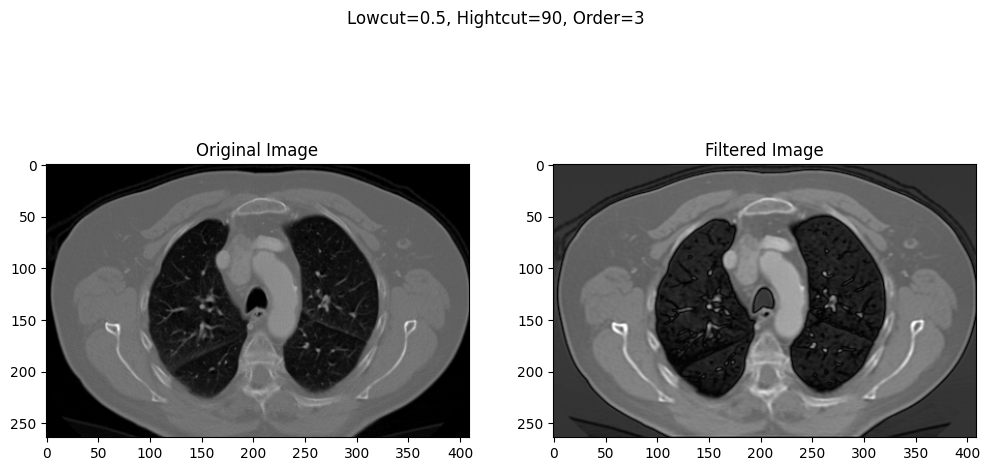

PSNR: 20.33022965794912
RMSE: 24.548711245757957
SNR: 5.5223373046935285


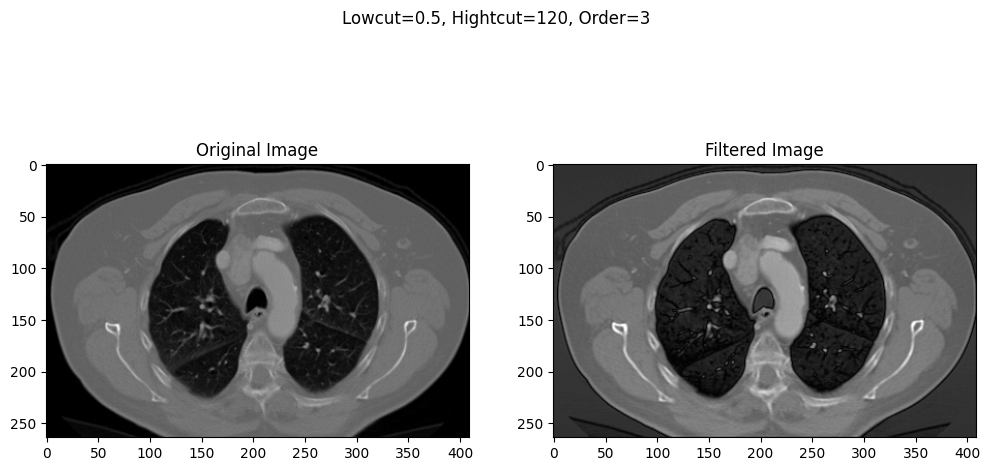

PSNR: 20.875071696828304
RMSE: 23.05613973560727
SNR: 5.524849603347384


In [ ]:
# Define the parameters to test
lowcuts = [0.1, 0.3, 0.45, 0.5]
highcuts = [90, 120]
orders = [3]

# Test each combination of parameters
for lowcut in lowcuts:
  for highcut in highcuts:
      for order in orders:

        # Apply Butterworth bandpass filter with the current parameters
        filtered_img = butterworth_bandpass_filter(img, lowcut=lowcut, highcut=highcut, order=order)

        # Display the original and processed images side by side
        plt.figure(figsize=(12,6))

        plt.subplot(1,2,1)
        plt.imshow(img, cmap='gray')
        plt.title('Original Image')

        plt.subplot(1,2,2)
        plt.imshow(filtered_img, cmap='gray')
        plt.title('Filtered Image')

        # Add a common title
        plt.suptitle(f'Lowcut={lowcut}, Hightcut={highcut}, Order={order}')
        plt.show()

        # Calculate the metrics for the filtered image
        psnr, rmse, snr = calculate_metrics(img, filtered_img)
        print(f"PSNR: {psnr}")
        print(f"RMSE: {rmse}")
        print(f"SNR: {snr}")

### Option 2:

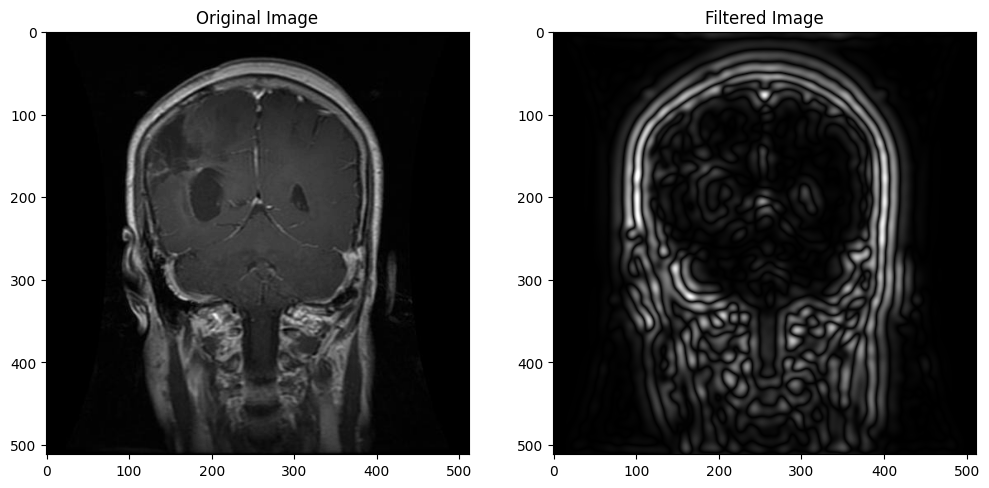

In [ ]:
# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2

# Load the image
img_path = '/content/Chest-CT-Scan-images-Dataset/sample/Training/glioma/Tr-gl_0010.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

def butterworth_bandpass_filter(image, lowcut, highcut, order=3):
    rows, cols = image.shape
    x = np.linspace(-0.5, 0.5, cols) * cols
    y = np.linspace(-0.5, 0.5, rows) * rows
    radius = np.sqrt((x[np.newaxis,:]**2) + (y[:,np.newaxis]**2))

    # Compute the low-pass filter
    lowpass = 1 / (1.0 + (radius / lowcut)**(2*order))

    # Compute the high-pass filter
    highpass = 1.0 - 1 / (1.0 + (radius / highcut)**(2*order))

    # Multiply the filters to get the band-pass filter
    bandpass = lowpass * highpass

    # Apply the filter to the Fourier transform of the image
    image_fft = fftshift(fft2(image))
    filtered_fft = image_fft * bandpass

    # Compute the inverse Fourier transform to get the filtered image
    filtered_image = np.abs(ifft2(ifftshift(filtered_fft)))

    # Scale the filtered image to the same range as the original image
    min_val = np.min(image)
    max_val = np.max(image) * 1.1 # Increase the maximum value to make the image brighter
    filtered_image = (filtered_image - np.min(filtered_image)) * (max_val - min_val) / (np.max(filtered_image) - np.min(filtered_image)) + min_val

    # # Add a constant value to all the pixels in the image to increase the brightness
    # filtered_image += 1  # Adjust this value as needed

    # Clip the pixel values to the valid range for images (0-255)
    filtered_image = np.clip(filtered_image, 0, 255)

    return filtered_image

# Apply Butterworth bandpass filter with the current parameters
filtered_img = butterworth_bandpass_filter(img, lowcut=15, highcut=30, order=3)

# Display the original and processed images side by side
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(filtered_img, cmap='gray')
plt.title('Filtered Image')

plt.show()

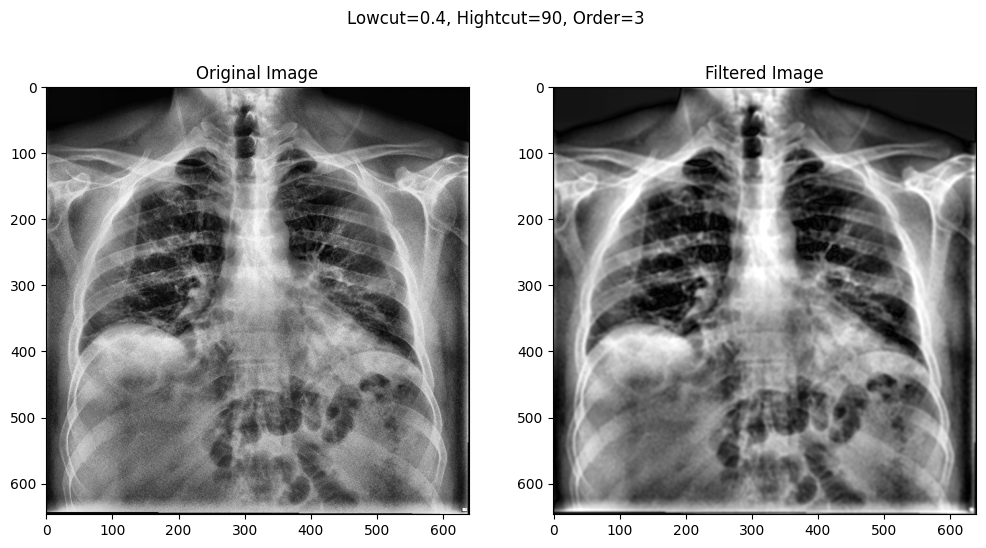

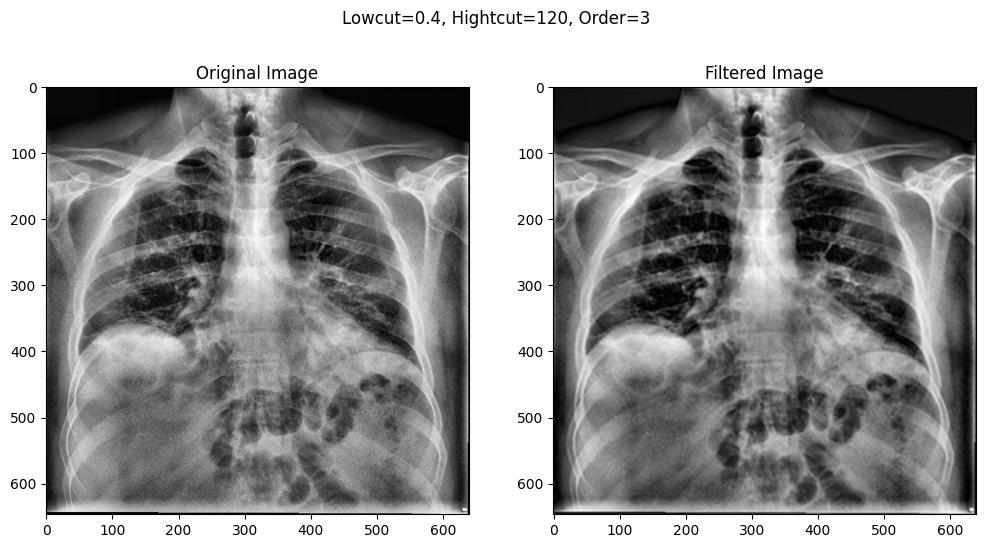

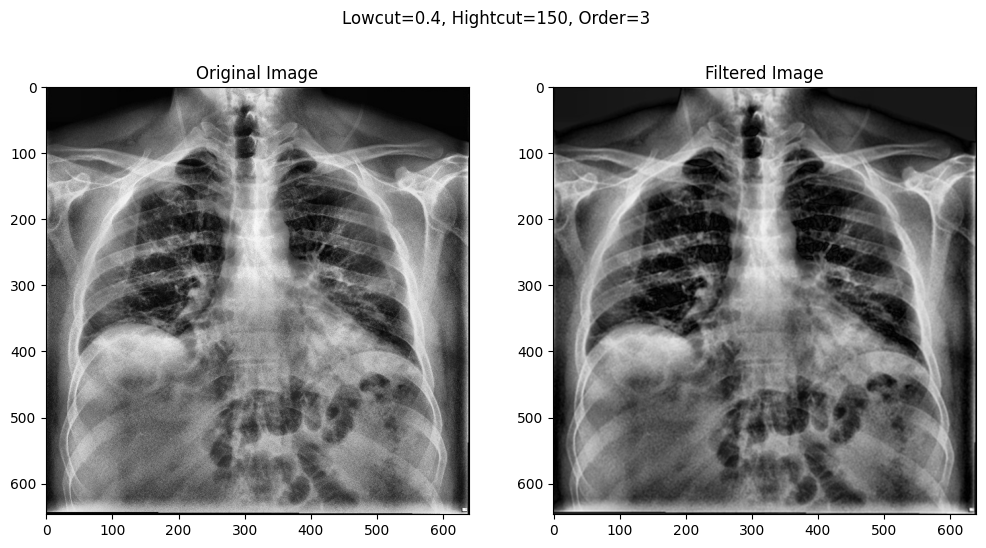

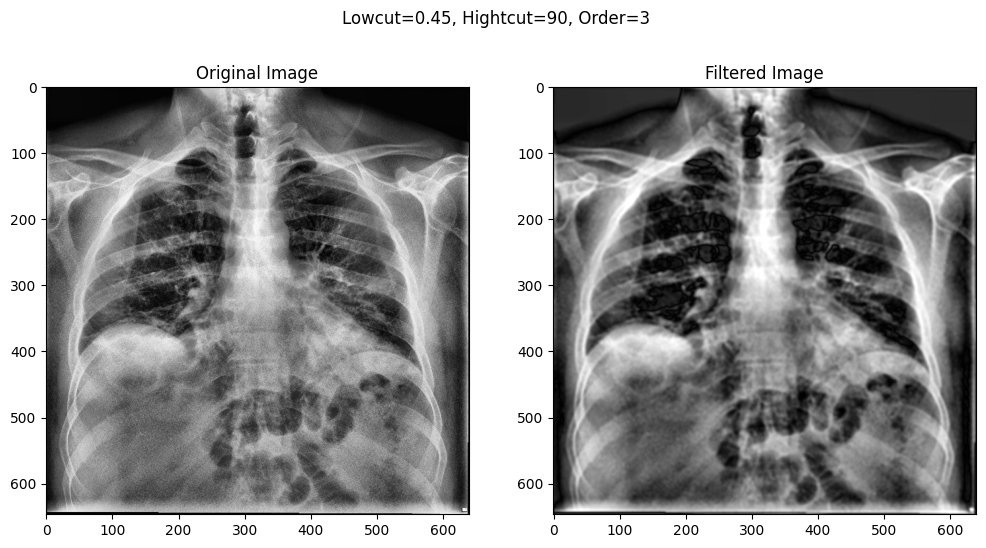

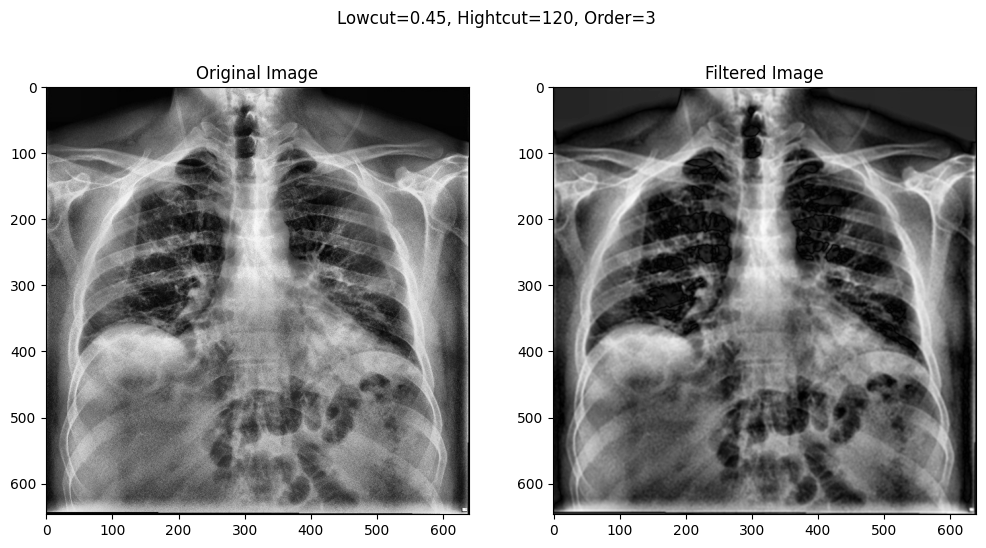

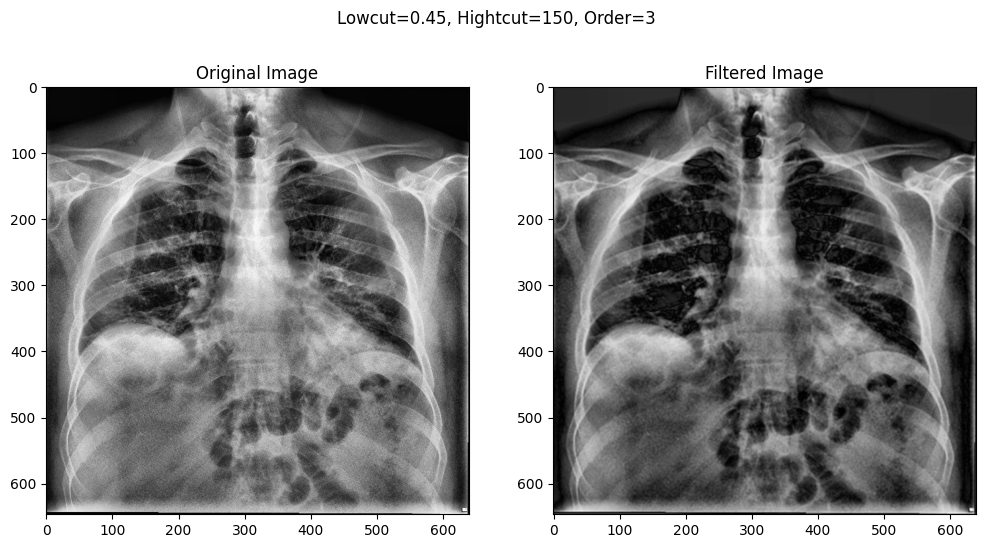

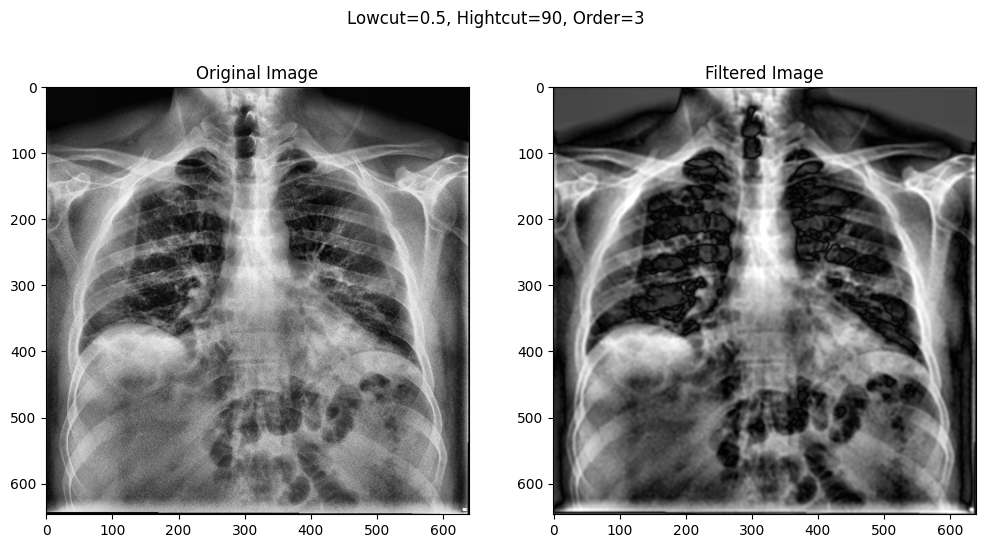

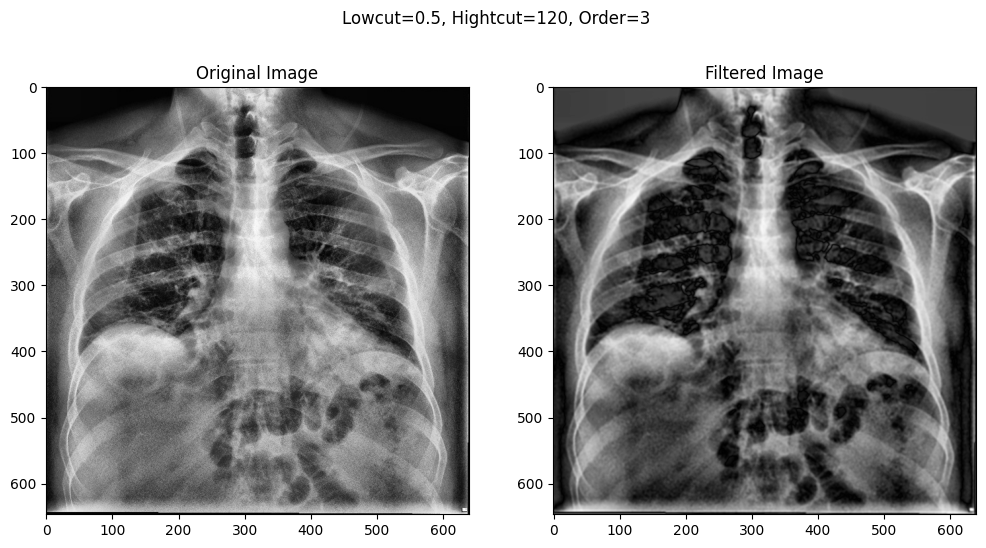

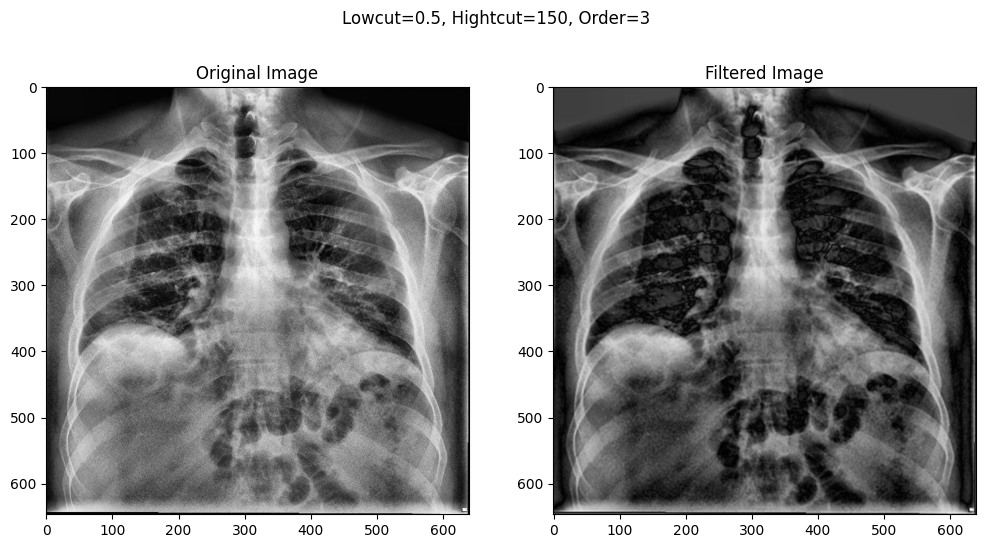

In [ ]:
# Define the parameters to test
lowcuts = [0.4, 0.45, 0.5]
highcuts = [90, 120, 150]
orders = [3]

# Test each combination of parameters
for lowcut in lowcuts:
  for highcut in highcuts:
      for order in orders:

        # Apply Butterworth bandpass filter with the current parameters
        filtered_img = butterworth_bandpass_filter(img, lowcut=lowcut, highcut=highcut, order=order)

        # Display the original and processed images side by side
        plt.figure(figsize=(12,6))

        plt.subplot(1,2,1)
        plt.imshow(img, cmap='gray')
        plt.title('Original Image')

        plt.subplot(1,2,2)
        plt.imshow(filtered_img, cmap='gray')
        plt.title('Filtered Image')

        # Add a common title
        plt.suptitle(f'Lowcut={lowcut}, Hightcut={highcut}, Order={order}')
        plt.show()

### Option 3:

It seems like you've provided a description of the application of a Butterworth bandpass filter in the context of image processing. Let me break down the information for better understanding:

1. **Objective:**
   - The goal is to eliminate noise from an image obtained in a previous step.

2. **Filter Type:**
   - A Butterworth bandpass filter (HBP) is employed for this purpose.

3. **Filter Calculation:**
   - The Butterworth bandpass filter is computed by combining the low-pass (HLP) and high-pass (HHP) filters.

4. **Low-Pass Filter (HLP):**
   - The low-pass filter is calculated using the formula:
$$ HLP(u, v) = \frac{1}{1 + \left(\frac{F(u, v)}{FL}\right)^{2n}} $$
     - $FL$ is the cut frequency of the low-pass filter (set to 15).
     - $F(u, v)$ is the distance from the origin.

5. **High-Pass Filter (HHP):**
   - The high-pass filter is calculated using the formula:
$$ HHP(u, v) = 1 - \frac{1}{1 + \left(\frac{F(u, v)}{FH}\right)^{2n}} $$
     - $FH$ is the cut frequency of the high-pass filter (set to 30).
     - $F(u, v)$ is the distance from the origin.

6. **Filter Order:**
   - $n$ is the filter order and is set to 3.

7. **Bandpass Filter (HBP):**
   - The Butterworth bandpass filter is obtained by multiplying the low-pass and high-pass filters:
     $$ HBP(u, v) = HLP(u, v) \times HHP(u, v) $$

8. **Filter Parameters:**
   - $FL$ and $FH$ are the cut frequencies for low and high-pass filters, respectively.
   - $n$ is the filter order.

In summary, this process involves designing a Butterworth bandpass filter with specific parameters to reduce noise in an image. The cut frequencies, filter order, and distance from the origin play crucial roles in determining the characteristics of the filter.

### CLAHE + Butterworth

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2

def butterworth_bandpass_filter(image, lowcut, highcut, order=3):
    rows, cols = image.shape
    x = np.linspace(-0.5, 0.5, cols) * cols
    y = np.linspace(-0.5, 0.5, rows) * rows
    [x, y] = np.meshgrid(x, y)
    radius = np.sqrt((x ** 2) + (y ** 2))

    # Compute the low-pass filter
    lowpass = 1 / (1.0 + (radius / lowcut)**(2*order))

    # Compute the high-pass filter
    highpass = 1.0 - 1 / (1.0 + (radius / highcut)**(2*order))

    # Multiply the filters to get the band-pass filter
    bandpass = lowpass * highpass

    # Apply the filter to the Fourier transform of the image
    image_fft = fftshift(fft2(image))
    filtered_fft = image_fft * bandpass

    # Compute the inverse Fourier transform to get the filtered image
    filtered_image = np.abs(ifft2(ifftshift(filtered_fft)))

    # Scale the filtered image to the same range as the original image
    min_val = np.min(image)
    max_val = np.max(image) * 1.3 # Increase the maximum value to make the image brighter
    filtered_image = (filtered_image - np.min(filtered_image)) * (max_val - min_val) / (np.max(filtered_image) - np.min(filtered_image)) + min_val

    # # Add a constant value to all the pixels in the image to increase the brightness
    # filtered_image += 1  # Adjust this value as needed

    # Clip the pixel values to the valid range for images (0-255)
    filtered_image = np.clip(filtered_image, 0, 255)

    return filtered_image

In [ ]:
import os
import cv2
import numpy as np
from shutil import copyfile

def preprocess_and_copy(src_dir, dest_dir, preprocess_func):
    # Check if src_dir is a directory
    if os.path.isdir(src_dir):
        # If dest_dir does not exist, create it
        os.makedirs(dest_dir, exist_ok=True)

        # Iterate over files/directories in src_dir
        for item in os.listdir(src_dir):
            src_item_path = os.path.join(src_dir, item)

            # If item is a directory, call function recursively
            if os.path.isdir(src_item_path):
                preprocess_and_copy(src_item_path, os.path.join(dest_dir, item), preprocess_func)
            # If item is a file, apply preprocessing and copy
            elif os.path.isfile(src_item_path):
                # Define the output file path
                filename_with_ext = os.path.basename(src_item_path)
                filename, extension = os.path.splitext(filename_with_ext)
                dest_item_path = os.path.join(dest_dir, filename + '.jpg')

                # Check if output file already exists
                if not os.path.exists(dest_item_path):
                    img = cv2.imread(src_item_path)
                    if img is not None:
                        img = preprocess_func(img)

                        # Export the preprocessed image to the output folder
                        cv2.imwrite(dest_item_path, img)

# Define your preprocessing function here
def preprocess_func(img):
    # TODO: Add your preprocessing steps here
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    # create a CLAHE object (Arguments are optional).
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(gray)

    # Apply Butterworth bandpass filter with the current parameters
    filtered_img = butterworth_bandpass_filter(cl1, lowcut=0.45, highcut=120, order=3)

    return filtered_img

# Usage:
# dataset_path = '/content/Chest-CT-Scan-images-Dataset/sample'
# output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Chest-CT-Scan-images-Dataset/CLAHE_Butterworth_sample'
dataset_path = '/content/Chest-CT-Scan-images-Dataset/dataset'
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Chest-CT-Scan-images-Dataset/CLAHE_Butterworth'
preprocess_and_copy(dataset_path, output_path, preprocess_func)
